# Setup and Env check

This notebook verifies our environment, confirms all dependencies are installed,
and ensures that the folder structure for the *Mixed Hidden Markov Model (mHMM)* project is complete.

It should be run first before `01_model_math.ipynb`.

In [1]:
import sys
import os
import platform
import importlib.util

print(f"Python version: {sys.version}")

print(f"Platform: {platform.system()} {platform.release()}")

print("Python Environment Check")

Python version: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:46:49) [Clang 19.1.7 ]
Platform: Darwin 24.4.0
Python Environment Check


In [2]:
#Verify dependencies

required_packages = [
    "numpy","scipy","pandas","matplotlib","seaborn","tqdm","jupyter",
    "joblib","numba","cmdstanpy"]

print ("Checking required packages...")

missing = []

for pkg in required_packages:
    try:
        importlib.import_module(pkg)
        print(f" - {pkg}: Installed")
    except ImportError:
        print(f" - {pkg}: MISSING")
        missing.append(pkg)

if missing:
    pint("\nMissing packages detected")
    print(" conda forge install " + " ".join(missing))
else:
    print("\nAll required packages are installed.")

Checking required packages...
 - numpy: Installed
 - scipy: Installed
 - pandas: Installed
 - matplotlib: Installed
 - seaborn: Installed
 - tqdm: Installed
 - jupyter: Installed
 - joblib: Installed
 - numba: Installed
 - cmdstanpy: Installed

All required packages are installed.


/opt/homebrew/Caskroom/miniconda/base/envs/mhmm_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
base_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
folders = [
    "models",
    "models/stan",
    "data",
    "data/simulated",
    "data/results"
]

print("\n📁 Checking folder structure in:", base_dir)

for folder in folders:
    path = os.path.join(base_dir, folder)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f" Created missing folder: {folder}")
    else:
        print(f"Folder exists: {folder}")



📁 Checking folder structure in: /Users/user/Documents/Projects/Markov-Models/mHMM
Folder exists: models
Folder exists: models/stan
Folder exists: data
Folder exists: data/simulated
Folder exists: data/results


In [4]:
#Confirm CmdStan installation
from cmdstanpy import cmdstan_path, install_cmdstan

try:
    path = cmdstan_path()
    print(f"✅ CmdStan found at: {path}")
except ValueError:
    print("⚠️ CmdStan not installed yet. Installing now... (this may take ~10–15 minutes)")
    install_cmdstan()


✅ CmdStan found at: /opt/homebrew/Caskroom/miniconda/base/envs/mhmm_env/bin/cmdstan


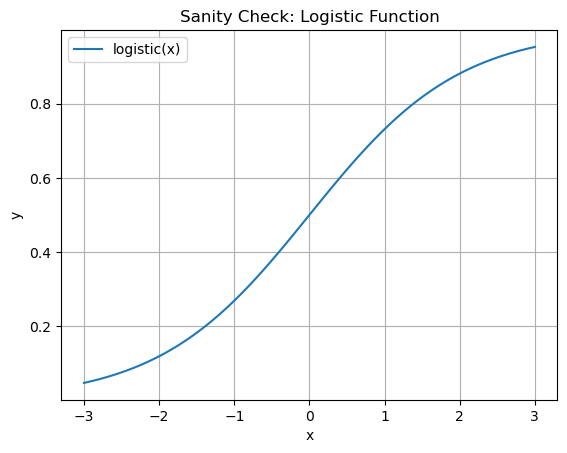


 Basic plotting and NumPy operations work correctly.


In [5]:
#Sanity Check Plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = 1/ (1+ np.exp(-x)) # Sigmoid function

plt.plot(x, y, label="logistic(x)")
plt.title("Sanity Check: Logistic Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

print("\n Basic plotting and NumPy operations work correctly.")

## Summary
# If:
- [x] Python environment verified  
- [x] Required packages installed  
- [x] Folder structure confirmed  
- [x] CmdStan installed and ready  
- [x] Basic math and plotting operational  

# Then: 
-Open **`01_model_math.ipynb`** to begin implementing the mathematical model equations (Eqs. 1–10 from the paper).
